In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
accidents = pd.read_csv("D:\Major project/Accidents.csv",index_col='Accident_Index')
print("Suucessfully")


Suucessfully


In [4]:
accidents.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number     

In [5]:
print("accidents")
print("size=",accidents.size)
print(accidents.shape)
accidents.head()

accidents
size= 3100
(100, 31)


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [6]:
vehicles= pd.read_csv('D:\Major project/Vehicles.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [7]:
print("vehicles")
print("size=",vehicles.size)
print(vehicles.shape)
vehicles.head()

vehicles
size= 2100
(100, 21)


,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,1,9,0,18,0,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
200501BS00002,1,11,0,4,0,3,0,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
200501BS00003,1,11,0,17,0,0,0,4,0,0,...,1,1,1,35,6,8300,2,5,2,1
200501BS00003,2,9,0,2,0,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
200501BS00004,1,9,0,18,0,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [8]:
casualties = pd.read_csv('D:\Major project/Casualties.csv', error_bad_lines=False, index_col='Accident_Index', warn_bad_lines=False)
print('Loaded')

Loaded


In [9]:
print("casualties")
print("size=",casualties.size)
print(casualties.shape)
casualties.head()

casualties
size= 1386
(99, 14)


,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [10]:
accidents = accidents.join(vehicles, how='outer')
print("done joining")
print(accidents.shape)

done joining
(141, 52)


In [11]:
#DataCleaning
accidents['Date_time'] = accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

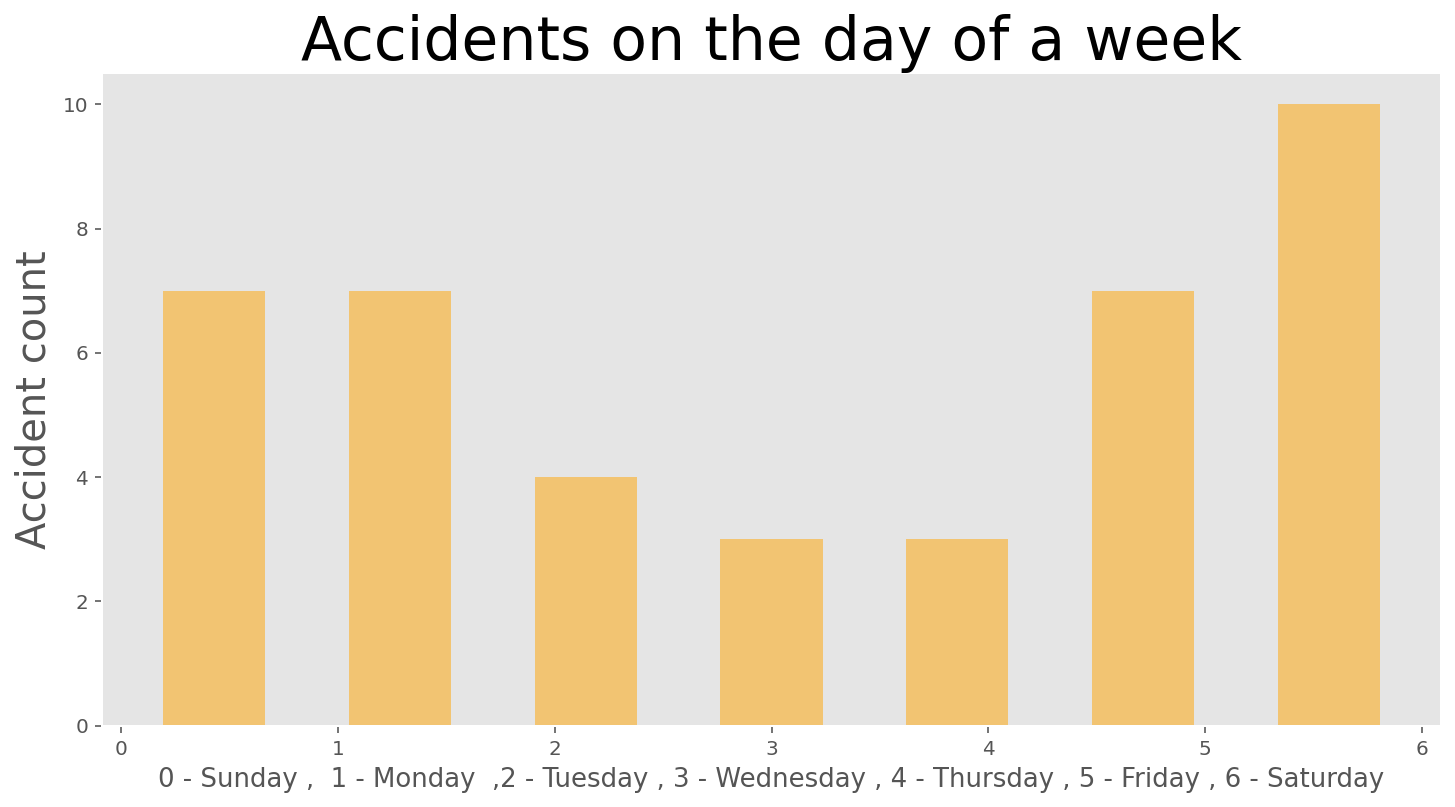

In [12]:
#DataVisualization
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

In [13]:
print("As we can see that thursday has the highest amount of accidents in this dataset from 2005 to 2015. We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.")

As we can see that thursday has the highest amount of accidents in this dataset from 2005 to 2015. We have to keep in mind that accidents numbers could be depending on traffic amount on particular day.


Text(0, 0.5, 'Accident count')

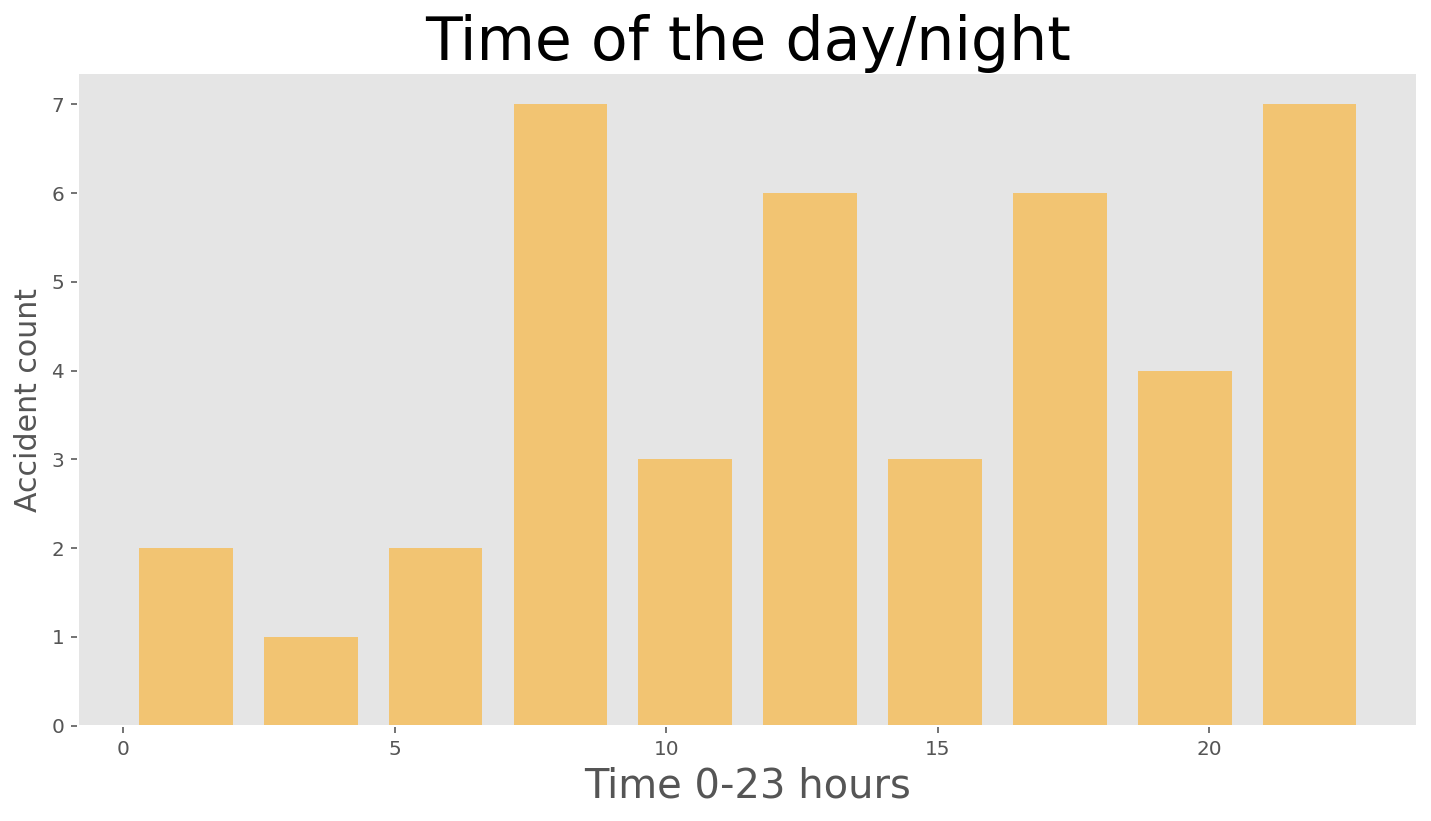

In [14]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

In [15]:
print("We found out that the most of accidents happened around after noon. We can assume that this time of the day has the most traffic moving such as people leaving from work.")

We found out that the most of accidents happened around after noon. We can assume that this time of the day has the most traffic moving such as people leaving from work.


Text(0.5, 0, 'Age of Drivers')

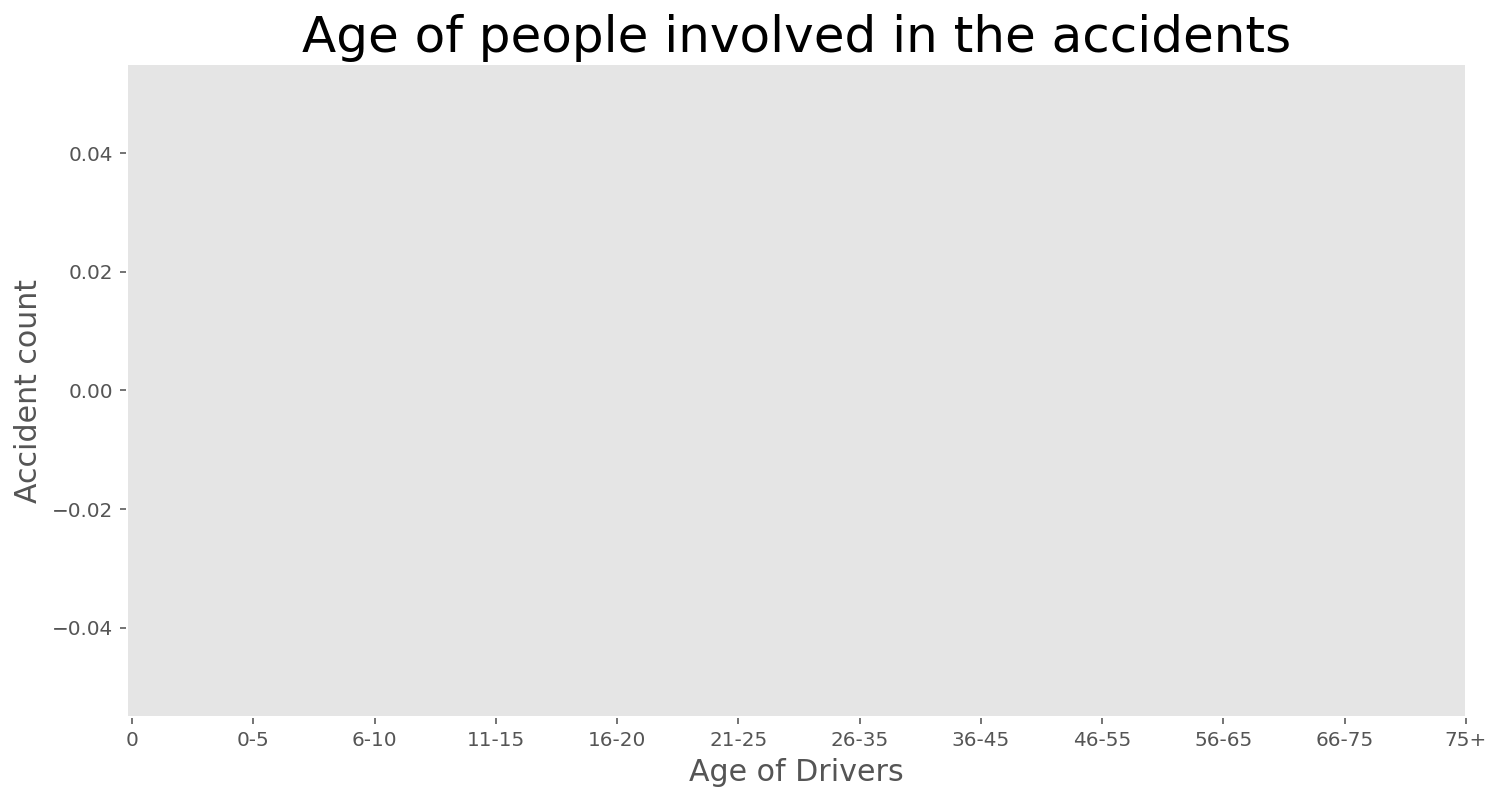

In [16]:
#Age band of casualities
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

In [17]:
print("This is very interesting fact about this dataset. Most of the drivers age is around 225 to 35 who are involved in the accident. However, we do not know the number of drivers with age 25 to 35 on the road compare to other ages. Intutively, I would assume that the driver with age 25 to 35 are more in the number of drivers with different age")

This is very interesting fact about this dataset. Most of the drivers age is around 225 to 35 who are involved in the accident. However, we do not know the number of drivers with age 25 to 35 on the road compare to other ages. Intutively, I would assume that the driver with age 25 to 35 are more in the number of drivers with different age


In [18]:
#speed_zone_accidents = accidents.loc[accidents['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
# speed  = speed_zone_accidents.Speed_limit.value_counts()

# explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
# plt.figure(figsize=(10,8))
# plt.pie(speed.values,  labels=None, 
#         autopct='%.1f',pctdistance=0.8, labeldistance=1.9 ,explode = explode, shadow=False, startangle=160,textprops={'fontsize': 15})
 
# plt.axis('equal')
# plt.legend(speed.index, bbox_to_anchor=(1,0.7), loc="center right", fontsize=15, 
#            bbox_transform=plt.gcf().transFigure)
# plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
# plt.show()

<AxesSubplot:>

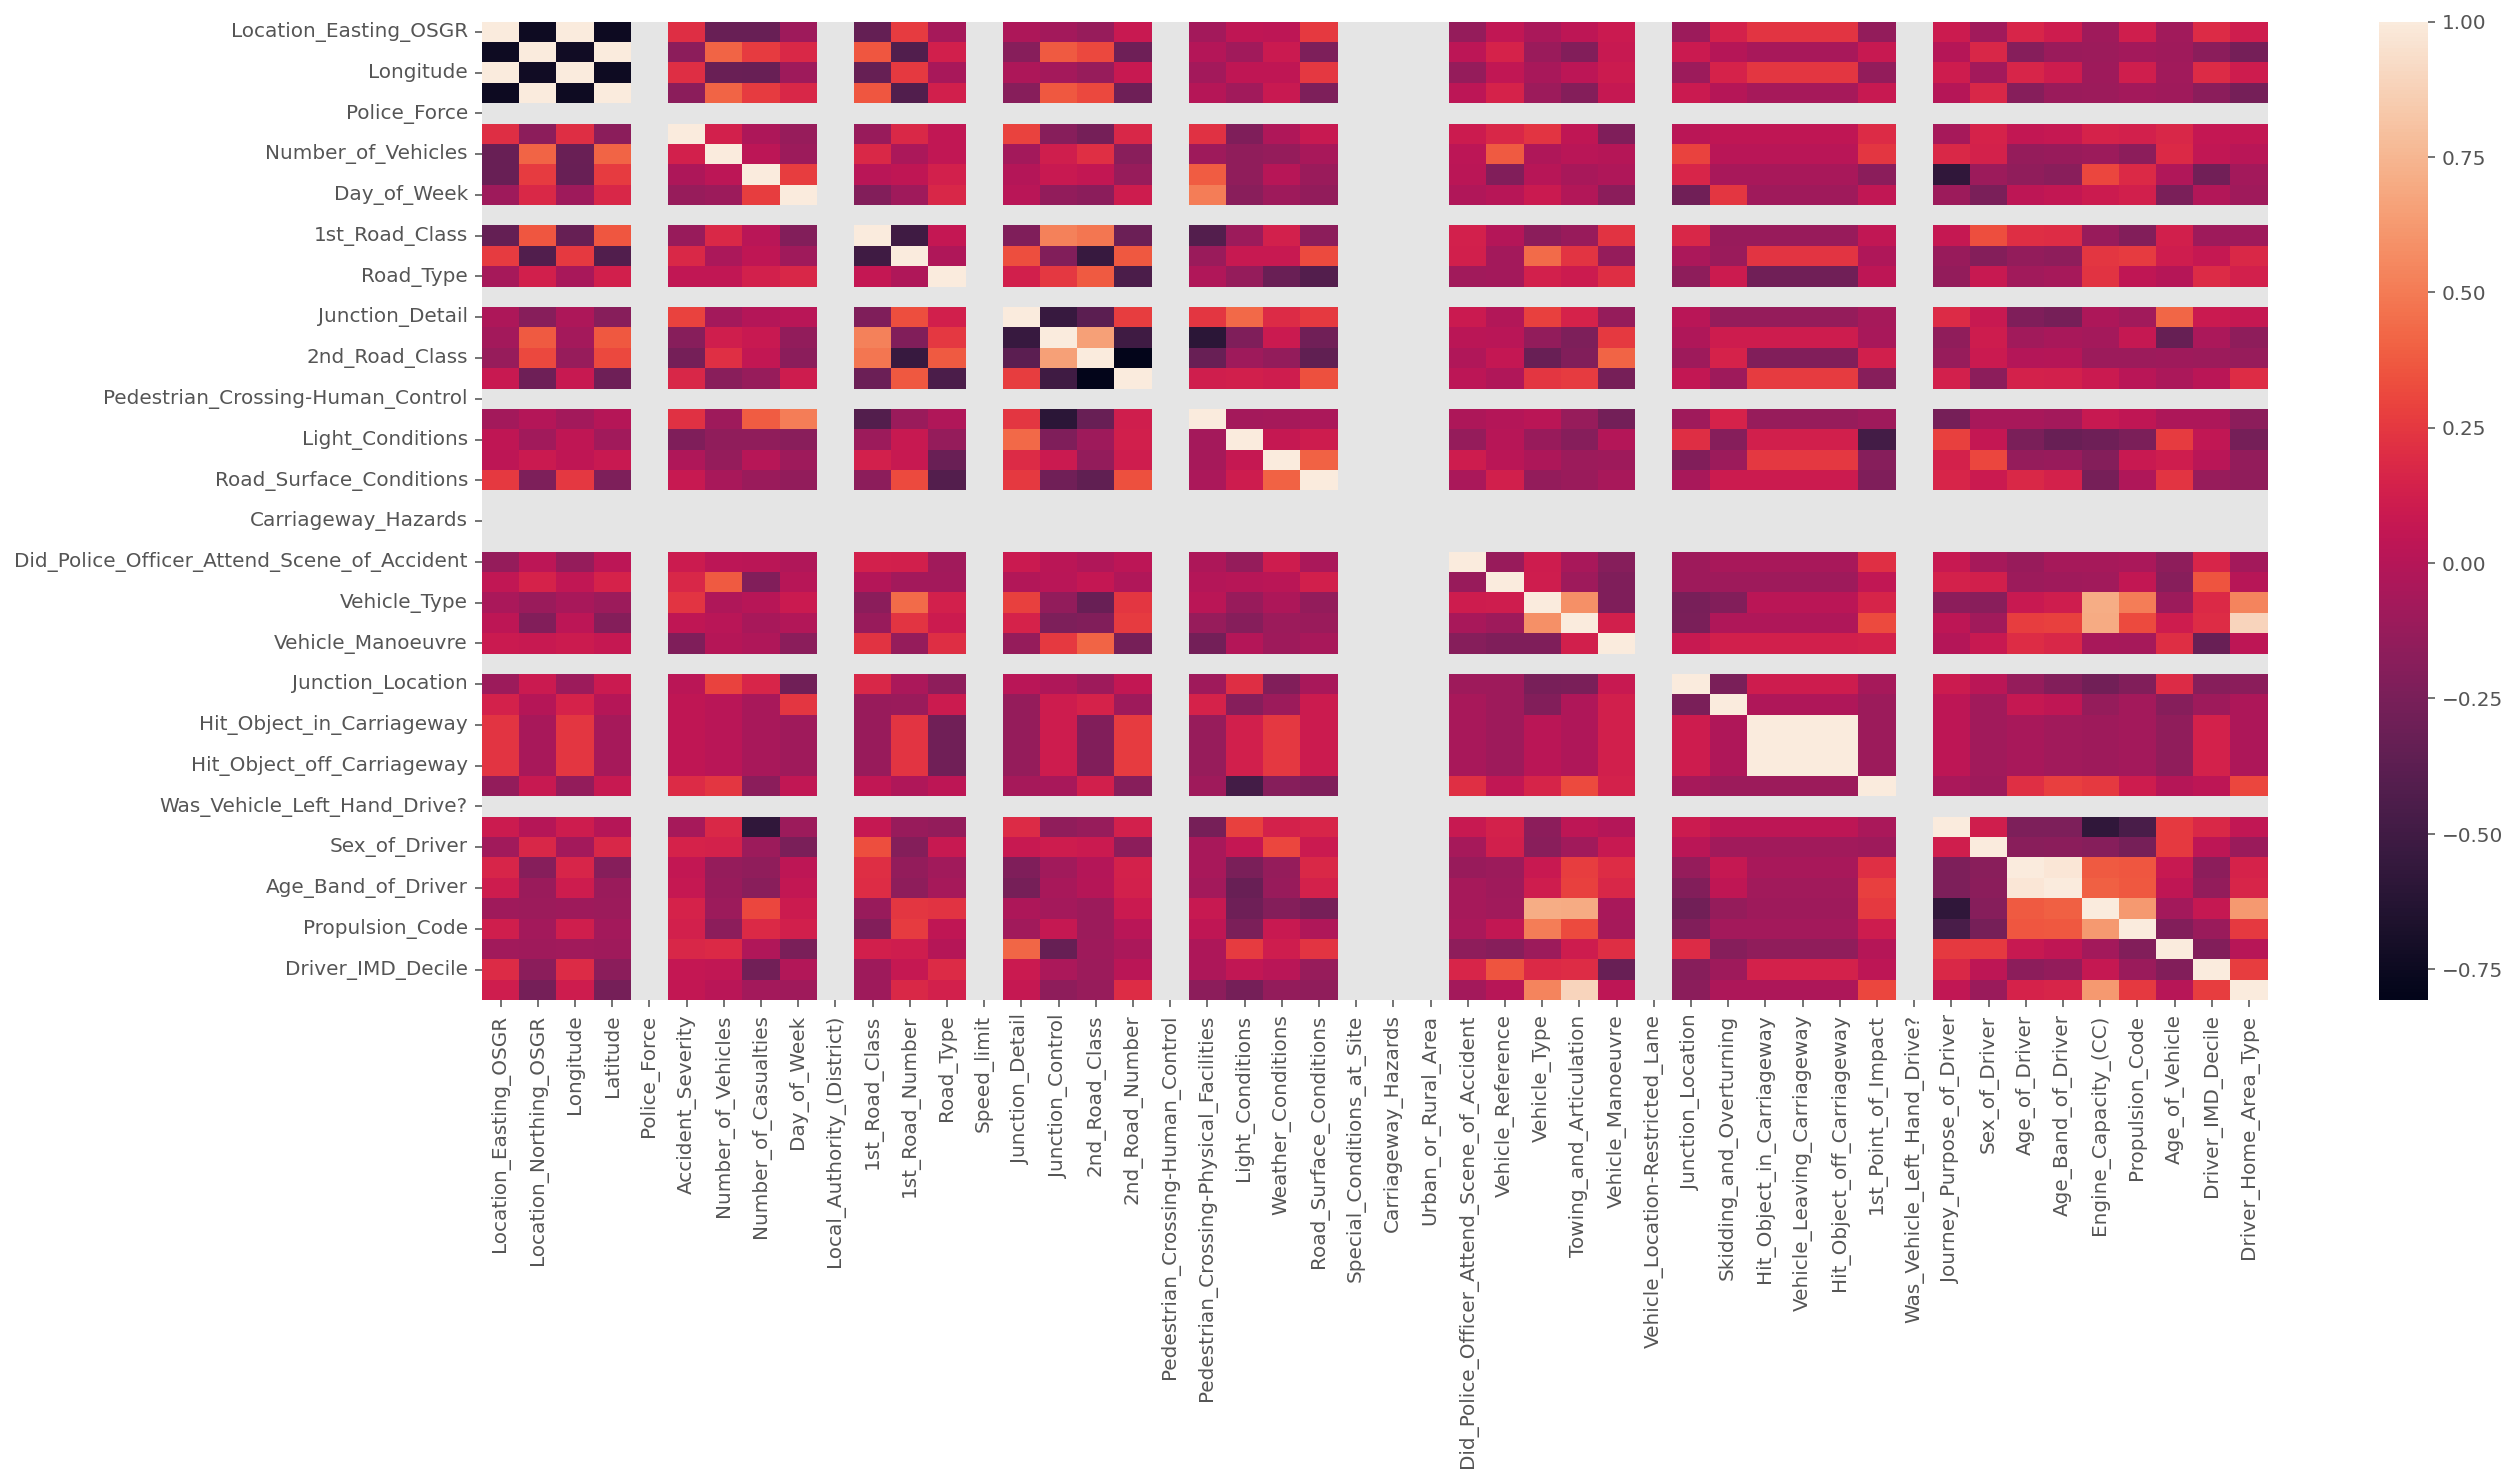

In [19]:
#Coorelation between variables
corr =  accidents.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

In [20]:
accidents_2014 = accidents[accidents.Date_time.dt.year ==2014]
accidents_2014_01 = accidents_2014[accidents_2014.Accident_Severity == 1]
accidents_2014_02 = accidents_2014[accidents_2014.Accident_Severity == 2]
accidents_2014_03 = accidents_2014[accidents_2014.Accident_Severity == 3]
print("done")

done


In [21]:
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
print("done")

done


done


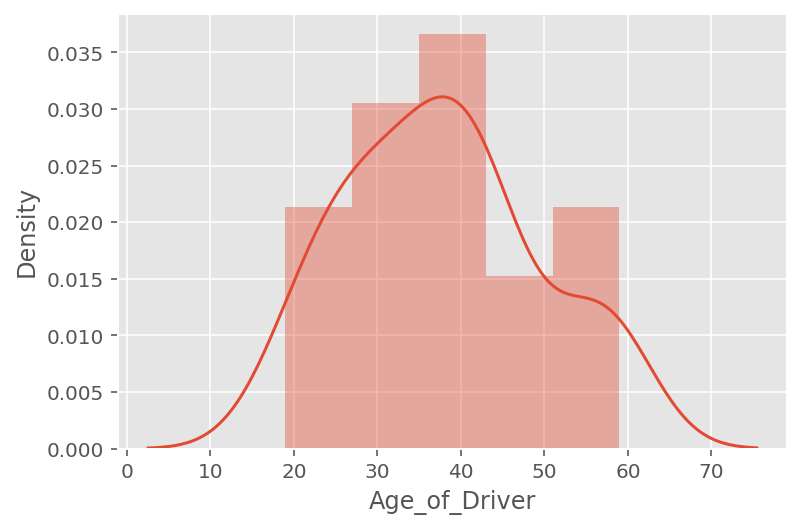

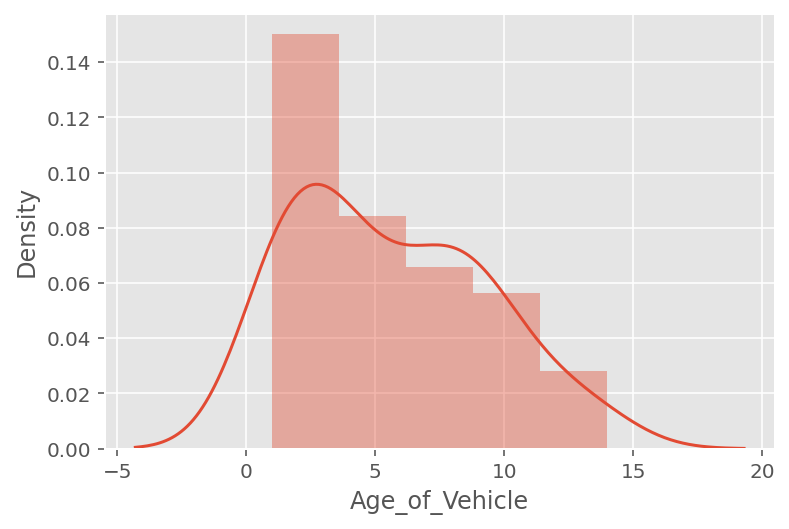

<Figure size 432x288 with 0 Axes>

In [22]:
#Normalize the Data
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()
print("done")

done


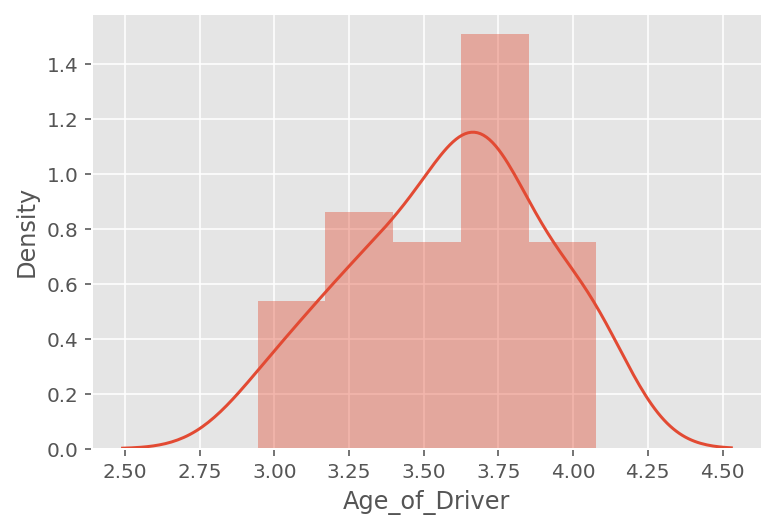

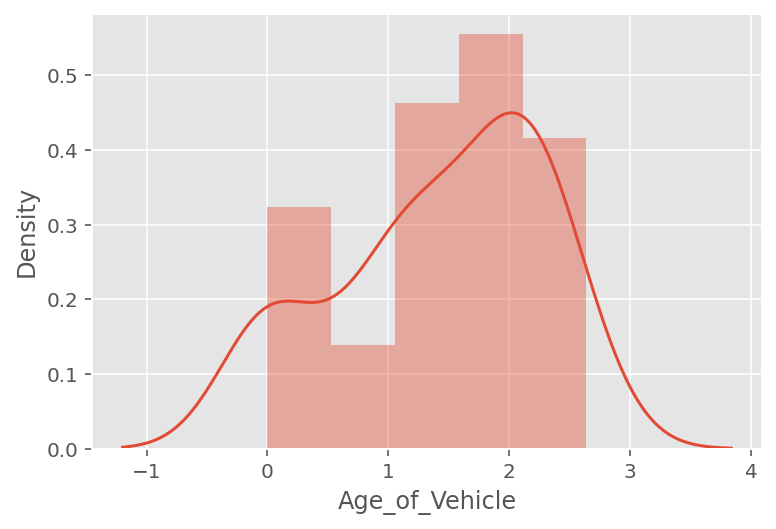

<Figure size 432x288 with 0 Axes>

In [23]:
accidents['Age_of_Driver'] = np.log(accidents['Age_of_Driver'])
accidents['Age_of_Vehicle'] = np.log(accidents['Age_of_Vehicle'])
sns.distplot(accidents['Age_of_Driver']);
fig = plt.figure()
sns.distplot(accidents['Age_of_Vehicle']);
fig = plt.figure()
print("done")

In [24]:
#Spliting the data into training data and test data
accident_ml = accidents.drop('Accident_Severity' ,axis=1)
accident_ml = accident_ml[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions'
                          , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]

accident_ml.head()

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20, random_state=99)
print("done")

done


In [25]:
X_train[0]

array([1.00000000e+00, 3.82864140e+00, 9.00000000e+00, 2.19722458e+00,
       1.98500000e+03, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 3.00000000e+01])

In [26]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 100.0
              precision    recall  f1-score   support

           3   1.000000  1.000000  1.000000         9

    accuracy                       1.000000         9
   macro avg   1.000000  1.000000  1.000000         9
weighted avg   1.000000  1.000000  1.000000         9

done


In [27]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

print("done")

Accuracy 100.0
              precision    recall  f1-score   support

           3   1.000000  1.000000  1.000000         9

    accuracy                       1.000000         9
   macro avg   1.000000  1.000000  1.000000         9
weighted avg   1.000000  1.000000  1.000000         9

done


In [28]:
#Predict
# sample = [7.0,3.2,4.7,1.4]
# print("done")
# sample.reshape(1, -1)
# result = clf.predict(sample).reshape(1, -1)
#result.reshape(1,-1)



print(accident_ml.head())
print(X_train.shape)
print(X_train[0])
print("done")

                Did_Police_Officer_Attend_Scene_of_Accident  Age_of_Driver  \
Accident_Index                                                               
200501BS00007                                             1       3.713572   
200501BS00010                                             1       3.555348   
200501BS00011                                             1       3.737670   
200501BS00012                                             1       3.526361   
200501BS00014                                             1       2.944439   

                Vehicle_Type  Age_of_Vehicle  Engine_Capacity_(CC)  \
Accident_Index                                                       
200501BS00007            9.0        1.386294                4266.0   
200501BS00010            9.0        2.564949                1998.0   
200501BS00011           11.0        0.693147                8268.0   
200501BS00012            9.0        1.791759                1988.0   
200501BS00014            9.0     

In [29]:
#Logistic Regression
lr = LogisticRegression()
# # Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
     y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 100.0
              precision    recall  f1-score   support

           3   1.000000  1.000000  1.000000         9

    accuracy                       1.000000         9
   macro avg   1.000000  1.000000  1.000000         9
weighted avg   1.000000  1.000000  1.000000         9



Predicted,3,All
Actual,,
3,9,9
All,9,9


In [30]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
     y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
# ### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 66.67
              precision    recall  f1-score   support

           2   0.000000  0.000000  0.000000         0
           3   1.000000  0.666667  0.800000         9

    accuracy                       0.666667         9
   macro avg   0.500000  0.333333  0.400000         9
weighted avg   1.000000  0.666667  0.800000         9



Predicted,2,3,All
Actual,,,
3,3,6,9
All,3,6,9


In [31]:
print("As we can see that Logistic regression did pretty well in terms of number. If we look carefully at the confusion matrix. We can definitely tell that Decision tree algorithm did much better. It predicted more fatal and serious injuries as true positive. The accuracy score is lower compare to another algorithm because other algorithm predicted majority of slightly accidents and those numbers are really high overall in the dataset. Confusion matrix helps us to understand what algorithm actually worked better in terms of looking at all different prediction of each class.")

As we can see that Logistic regression did pretty well in terms of number. If we look carefully at the confusion matrix. We can definitely tell that Decision tree algorithm did much better. It predicted more fatal and serious injuries as true positive. The accuracy score is lower compare to another algorithm because other algorithm predicted majority of slightly accidents and those numbers are really high overall in the dataset. Confusion matrix helps us to understand what algorithm actually worked better in terms of looking at all different prediction of each class.


In [32]:
#Logistic Regression with Hyperparameter tuning
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=3, random_state=0,multi_class='multinomial')
# # Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 100.0
              precision    recall  f1-score   support

           3   1.000000  1.000000  1.000000         9

    accuracy                       1.000000         9
   macro avg   1.000000  1.000000  1.000000         9
weighted avg   1.000000  1.000000  1.000000         9



Predicted,3,All
Actual,,
3,9,9
All,9,9


In [33]:
#Decision Tree hyperparameters tuning
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=4)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
     y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
# ### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 100.0
              precision    recall  f1-score   support

           3   1.000000  1.000000  1.000000         9

    accuracy                       1.000000         9
   macro avg   1.000000  1.000000  1.000000         9
weighted avg   1.000000  1.000000  1.000000         9



Predicted,3,All
Actual,,
3,9,9
All,9,9


In [37]:
#Random Forest Hyperparameter tuning
random_forest.get_params()
#We will implement the grid search using sklearn library.

from sklearn.model_selection import RandomizedSearchCV
param_grid = {
     'bootstrap': [True],
     'max_depth': [80, 90, 100, 110],
     'max_features': [4, 5],
     'min_samples_leaf': [5, 10, 15],
     'min_samples_split': [8, 10, 12],
     'n_estimators': [100, 200, 300]
 }
# # Create a based model
random_f = RandomForestClassifier()
##Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = random_f, param_distributions = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [80, 90, 100, 110],
                                        'max_features': [4, 5],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [8, 10, 12],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [38]:
#Feature importance
#We can use Sklearn's random forest library to find out the most important features. We will be plotting in ascending order so we know what features are most important to predict the accident severity.

<AxesSubplot:>

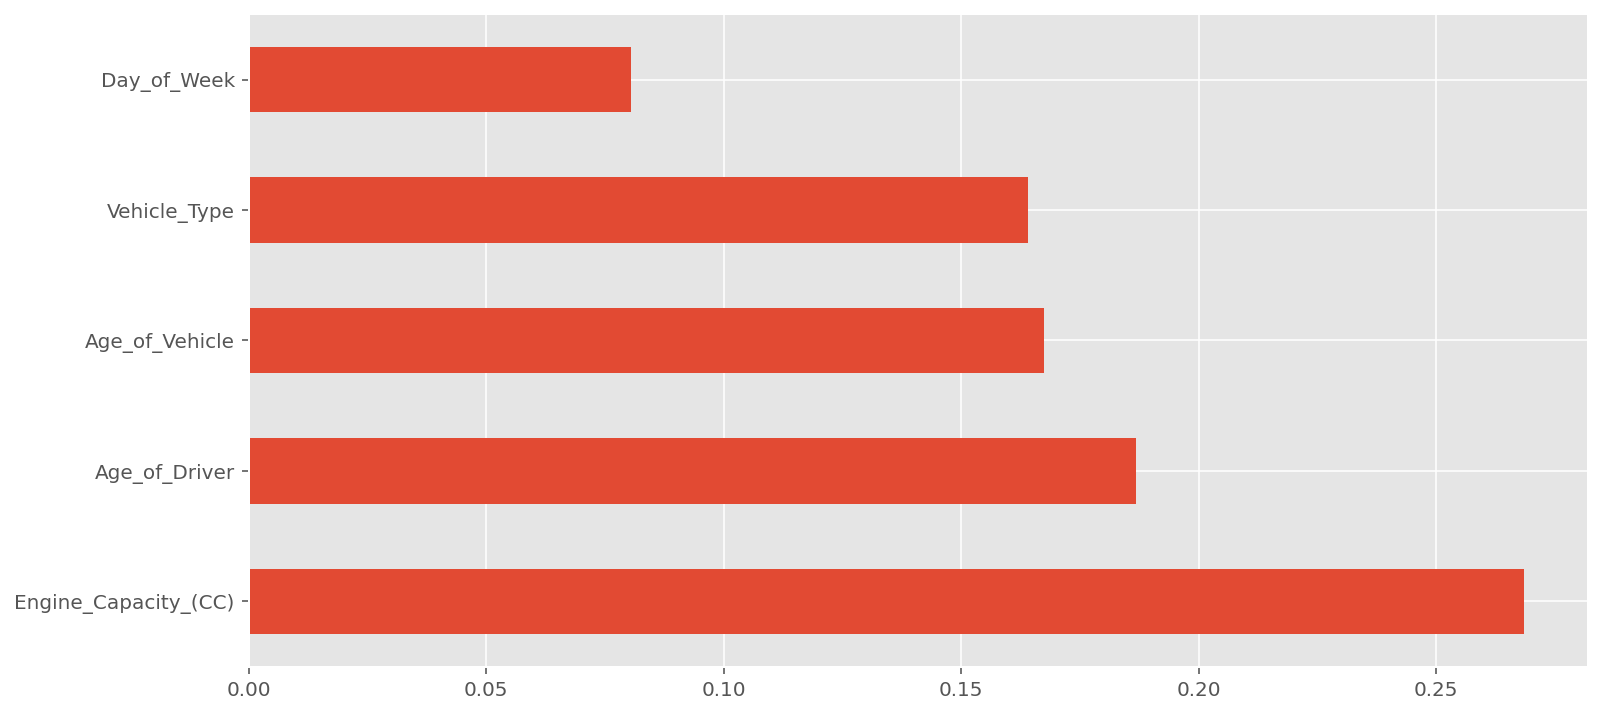

In [39]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [40]:
Y_pred = grid_search.predict(X_test)
acc_random_forest1 = round(grid_search.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
     digits=6,
     y_true=y_test, 
     y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 100.0
              precision    recall  f1-score   support

           3   1.000000  1.000000  1.000000         9

    accuracy                       1.000000         9
   macro avg   1.000000  1.000000  1.000000         9
weighted avg   1.000000  1.000000  1.000000         9



Predicted,3,All
Actual,,
3,9,9
All,9,9


In [41]:
print("Conclusion")
print("As we have implemented the Logistic Regression, Decision Tree and Random Forest algorithms to predict the accidents. There are two things that we can conclude from this learning.")

Conclusion
As we have implemented the Logistic Regression, Decision Tree and Random Forest algorithms to predict the accidents. There are two things that we can conclude from this learning.


In [42]:
print("Machine Learning Conclusion")
print("As we have tried three different algorithms to predict the road accidents. It was clear that Decision tree and Random Forest performed much better in terms of predicting all the classes of roadaccidents. Logistic regression has better accuracy but it does not mean it did better than other algorithm. We even tried multi-nomial to predict all the classes in hyperparameter tuning section. It still predicted only one of the higher occuring class.")

Machine Learning Conclusion
As we have tried three different algorithms to predict the road accidents. It was clear that Decision tree and Random Forest performed much better in terms of predicting all the classes of roadaccidents. Logistic regression has better accuracy but it does not mean it did better than other algorithm. We even tried multi-nomial to predict all the classes in hyperparameter tuning section. It still predicted only one of the higher occuring class.
